### Read dataset into Pandas DataFrame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 999
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

df = pd.read_csv("diamonds.csv")

### Examine Data
- For first pass, keep only the 4Cs (Carat, Cut, Clarity, Color)
- Include a fifth "C": Certification
- Explore feature distribution

In [2]:
df.head()

,carat,cut,color,clarity,table,depth,cert,measurements,price,wlink
0,0.20,V.Good,D,SI2,63.0,60.4,GIA,3.82 x 3.79 x 2.30,$203,http://www.diamondse.info/union.asp?sku=AE1169384
1,0.26,V.Good,G,SI1,63.0,62.7,EGL USA,4.04 x 4.00 x 2.52,$224,http://www.diamondse.info/union.asp?sku=AE1260440
2,0.23,Good,F,SI1,62.0,61.6,GIA,3.93 x 3.88 x 2.41,$229,http://www.diamondse.info/union.asp?sku=AE1708436
3,0.25,Good,H,I1,65.0,54.1,GIA,4.34 x 4.26 x 2.33,$232,http://www.diamondse.info/union.asp?sku=AE1329666
4,0.22,V.Good,K,VVS2,62.0,59.0,GIA,3.96 x 3.84 x 2.30,$234,http://www.diamondse.info/union.asp?sku=AE1663502


In [3]:
df.describe()

,carat,table,depth
count,222960.000000,222960.000000,222960.000000
mean,0.708266,57.718687,61.657001
std,0.320616,1.967557,5.827030
min,0.200000,0.000000,0.000000
25%,0.460000,56.000000,61.400000
50%,0.700000,57.000000,62.200000
75%,1.000000,59.000000,62.800000
max,2.000000,72.000000,75.000000


In [4]:
# Remove unused features: table, depth, measurements, wlink
df = df.drop(['measurements', 'wlink'], axis=1)
# Get counts for each value of a categorical feature in dataset
print df['cut'].value_counts()
print df['color'].value_counts()
print df['clarity'].value_counts()
print df['cert'].value_counts()

Ideal     163750
V.Good     45318
Good       13892
Name: cut, dtype: int64
G    38461
F    35704
E    35493
D    33894
H    31858
I    22461
J    15097
K     6315
L     3677
Name: color, dtype: int64
VS2     39354
SI1     37469
VS1     36788
SI2     31824
VVS2    29833
VVS1    26953
IF      17022
I1       3480
I2        191
FL         46
Name: clarity, dtype: int64
GIA         217003
EGL Intl      2141
AGS           1310
IGI            887
HRD            879
EGL USA        704
AGSL            36
Name: cert, dtype: int64


### Pre-process the data
- Price: Remove "," "$", convert to float, take log
- Convert Categorical features Cut, Clarity, Color, Cert to one-hot encoded features.
- Drop Cut, Clarity, Color, Cert after one-hot encoding

In [5]:
def xform_price(df):
    df['price'] = df['price'].apply(lambda x:x.replace(',',''))
    df['price'] = df['price'].apply(lambda x:x[1:len(x)])
    df['price'] = df['price'].astype(float)
    return df
    
def xform_4c(df):
    for X in ['cut','clarity','color','cert']:
        X_dummies = pd.get_dummies(df[X], prefix = X)
        X_columns = X_dummies.columns.values[:-1]
        df = df.join(X_dummies[X_columns])
    return df

In [6]:
df.shape

(222960, 8)

In [7]:
df = xform_price(df)
df = xform_4c(df)

In [8]:
df.head()

,carat,cut,color,clarity,table,depth,cert,price,cut_Good,cut_Ideal,clarity_FL,clarity_I1,clarity_I2,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,color_D,color_E,color_F,color_G,color_H,color_I,color_J,color_K,cert_AGS,cert_AGSL,cert_EGL Intl,cert_EGL USA,cert_GIA,cert_HRD
0,0.20,V.Good,D,SI2,63.0,60.4,GIA,203.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.26,V.Good,G,SI1,63.0,62.7,EGL USA,224.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.23,Good,F,SI1,62.0,61.6,GIA,229.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0.25,Good,H,I1,65.0,54.1,GIA,232.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0.22,V.Good,K,VVS2,62.0,59.0,GIA,234.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [9]:
df.shape

(222960, 33)

In [10]:
df.describe()

,carat,table,depth,price,cut_Good,cut_Ideal,clarity_FL,clarity_I1,clarity_I2,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,color_D,color_E,color_F,color_G,color_H,color_I,color_J,color_K,cert_AGS,cert_AGSL,cert_EGL Intl,cert_EGL USA,cert_GIA,cert_HRD
count,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000,222960.000000
mean,0.708266,57.718687,61.657001,3136.518142,0.062307,0.734437,0.000206,0.015608,0.000857,0.076346,0.168053,0.142734,0.164998,0.176507,0.120887,0.152018,0.159190,0.160136,0.172502,0.142887,0.100740,0.067712,0.028323,0.005875,0.000161,0.009603,0.003158,0.973282,0.003942
std,0.320616,1.967557,5.827030,2386.972700,0.241713,0.441634,0.014362,0.123954,0.029256,0.265551,0.373914,0.349802,0.371180,0.381252,0.325997,0.359039,0.365854,0.366733,0.377817,0.349958,0.300985,0.251251,0.165896,0.076426,0.012706,0.097522,0.056103,0.161258,0.062665
min,0.200000,0.000000,0.000000,203.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.460000,56.000000,61.400000,1240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.700000,57.000000,62.200000,2319.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,59.000000,62.800000,4540.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2.000000,72.000000,75.000000,10000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df = df.drop(['cut','clarity','color','cert'], axis=1)

# Fit a Linear Regression for "Price" vs. all other features
- Split dataset to train and test sets (80-20)
- Train model using "train" dataset
- Score model on the "test" dataset
- Features are normalized by sci-kit learn's LinearRegression function
- Score is R-squared metric for linear regression
- MSE is mean-square-error between prediction and actual price for test dataset
- Take a look at regression coefficients. Do they look reasonable?

In [12]:
from sklearn.model_selection import train_test_split
y = df['price']
X = df.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression(normalize=True)
regr.fit(X_train, y_train)
score = regr.score(X_test, y_test)
mse = np.mean((regr.predict(X_test) - y_test) ** 2)
print score, mse

0.904156360744 549257.908529


In [14]:
feats = X.columns
feat_dict = dict(zip(feats,regr.coef_))
feat_dict

{'carat': 7783.4358964893681,
 'cert_AGS': 242.54101710051933,
 'cert_AGSL': 1428.3682074891785,
 'cert_EGL Intl': -1122.7062460591242,
 'cert_EGL USA': 317.33449005999705,
 'cert_GIA': 641.31336230388422,
 'cert_HRD': 545.24293509823644,
 'clarity_FL': 1837.9303220344425,
 'clarity_I1': -2164.7209861903075,
 'clarity_I2': -2760.670152224197,
 'clarity_IF': 388.93887195216917,
 'clarity_SI1': -658.74587690578073,
 'clarity_SI2': -1093.27035442856,
 'clarity_VS1': -80.293156364591468,
 'clarity_VS2': -263.18180795297116,
 'clarity_VVS1': 199.88145129737464,
 'color_D': 2467.0133474714726,
 'color_E': 2368.0380332515488,
 'color_F': 2235.4332332991339,
 'color_G': 2068.2828042895349,
 'color_H': 1802.0269518319876,
 'color_I': 1352.9111942611291,
 'color_J': 763.080104250305,
 'color_K': 371.0113824632619,
 'cut_Good': -212.54373499375495,
 'cut_Ideal': 302.54967966442729,
 'depth': -3.4543200119948918,
 'table': 10.363874995864862}

### Can we do better? 
- Since price varies from \$200 to \$10000, let's try using log(price)

In [15]:
df['price'] = np.log(df['price'])
y = df['price']
X = df.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regr = linear_model.LinearRegression(normalize=True)
regr.fit(X_train, y_train)
score = regr.score(X_test, y_test)
mse = np.mean((regr.predict(X_test) - y_test) ** 2)
print score, mse

0.898602050539 0.0669973943584


In [16]:
#feats = X.columns
#feat_dict = dict(zip(feats,regr.coef_))
#feat_dict

### Can we do better? Add carat3
- Define new variable "carat_3" as a measure of the diameter (size) of the diamond
- diamond density is 3.5 g/cm3
- 1 carat = 0.2 g
- Mass (g) = 0.2 * carat
- Volume = Mass / Density = 0.2 * carat / 3.5 in cm3
- Size ~ Volume^1/3 ~ carat~1/3

In [17]:
df['carat_3'] = df['carat'].apply(lambda x:np.power(x,float(1./3)))
y = df['price']
X = df.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regr = linear_model.LinearRegression(normalize=True)
regr.fit(X_train, y_train)
score = regr.score(X_test, y_test)
mse = np.mean((regr.predict(X_test) - y_test) ** 2)
print score, mse

0.960203755893 0.0262948577816


### Plot Predicted Price (Blue) vs Actual Price (Red) for a subset of the test dataset 
- (Ideal Cut, Color J, Clarity SI2)

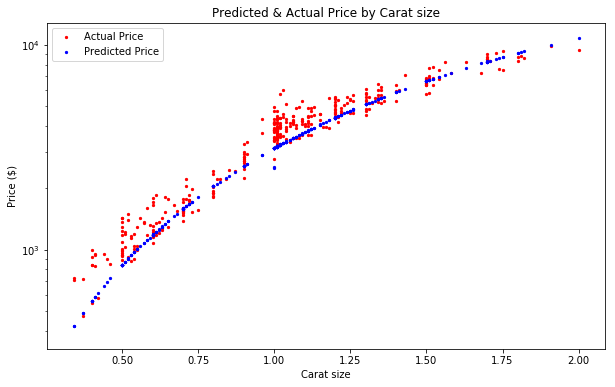

In [18]:
df_plot = df[(df.cut_Ideal==1) & (df.color_J==1) & (df.clarity_SI2==1)]
df_train, df_test = train_test_split(df_plot, test_size=0.2, random_state=42)
y_plot = df_test['price']
X_plot = df_test.drop(['price'], axis=1)

plt.rcParams['figure.figsize'] = (10,6)
plt.scatter(X_plot['carat'], np.exp(y_plot), s=5, color='red', label = 'Actual Price')
plt.scatter(X_plot['carat'], np.exp(regr.predict(X_plot)), s=5, color='blue', label = 'Predicted Price')
plt.title('Predicted & Actual Price by Carat size')
plt.xlabel('Carat size')
plt.ylabel('Price ($)')
plt.semilogy()
plt.legend(loc='best')
plt.show()


In [19]:
df.head()

,carat,table,depth,price,cut_Good,cut_Ideal,clarity_FL,clarity_I1,clarity_I2,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,color_D,color_E,color_F,color_G,color_H,color_I,color_J,color_K,cert_AGS,cert_AGSL,cert_EGL Intl,cert_EGL USA,cert_GIA,cert_HRD,carat_3
0,0.20,63.0,60.4,5.313206,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.584804
1,0.26,63.0,62.7,5.411646,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.638250
2,0.23,62.0,61.6,5.433722,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.612693
3,0.25,65.0,54.1,5.446737,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.629961
4,0.22,62.0,59.0,5.455321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.603681
